<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/master/Class_01_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module I: Getting Started with Python**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Integrative Biology](https://sciences.utsa.edu/integrative-biology/), [UTSA](https://www.utsa.edu/)


### Module I Material

* Part 1.1: Introduction to Google CoLab
* Part 1.2: Python Basics 1 -- Strings, Variables and Indexing
* Part 1.3: Python Basics 2 -- Numbers, Booleans, Operators and Comparisons
* Part 1.4: Python Basics 3 -- Lists, Dictionaries, Sets and JSON
* Part 1.5: Python Basics 4 -- Conditionals and Loops
* Part 1.6: Python Basics 5 -- Packages, NumPy arrays and Matplotlib
* **Part 1.7: Python Basics 6 -- Pandas and File Handling**

### Google CoLab Instructions

The following code ensures that Google CoLab is running the correct version of TensorFlow.

In [2]:
# YOU MUST RUN THIS CELL FIRST

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: not using Google CoLab


# Part 1.7: Python Basics

In this lesson we will focus on the software package, Pandas, and on file handling. These two topics naturally go together since the Pandas package includes a number of file handling methods that are frequently used in Python programming.

## Pandas

**_Pandas_** (pronounced as "PAN-daz") is a Python package designed for data manipulation and analysis. It provides data structures and operations for manipulating numerical tables and time series. 

Pandas is built on top of the Numpy package and provides a high-level interface for working with data including data selection, cleaning, filtering, aggregation, and visualization. 

A central concept in Pandas is the **_DataFrame_**. A Pandas DataFrame is generally the most commonly used Pandas object. 

A _DataFrame_ is a two-dimensional labeled data structure with columns of potentially different data types (e.g. integers, floats, and strings). They are very similar to an Excel spreadsheet in which each **_row_** represents a single experimental subject or clinical patient and each **_column_** contains a different experimental or clinical measurement from the subject.


### The Pandas Package

Like other Python packages, Pandas has to be _imported_ into a Python program with the following command before it can be used.

`import pandas as pd`

The normal _alias_ ('nickname') for Pandas is `pd`. When using a method that is part of a Pandas package, the alias `pd` will be used instead of the package name. For example, to use the Pandas `read_csv()` method, the command would be:

`pd.read_csv(filename)`

Run the next code cell to import `pandas` which is needed for the examples and exercises below.

In [3]:
# RUN THIS CODE CELL

# Import the package Pandas
import pandas as pd

When you import a Python package _successfully_ , there is usually no output. 

If you receive an error it probably means that the package has **not** been previously installed in your current `conda` environment. 

If you need to install Pandas, uncomment the `conda install` command in the next cell and then run the cell.

In [4]:
# Uncomment the next line and run this cell ONLY if you need to install pandas

#!conda install pandas -y

## File handling

**_File handling_** in Python is the process of manipulating files and data stored in a file system. This includes reading and writing files, creating and deleting files, accessing metadata about files, and more. 

Python has a variety of built-in functions to help with file handling, such as the `open()` and `close()` functions for opening and closing files, and the `os module` for interacting with the file system. Additionally, there are several third-party libraries that can be used to simplify file handling, such as the Pandas library for working with tabular data.

Files often contain the data that you use to train your AI programs. Once trained, your models may use real-time data to form predictions. These predictions might be made on files too. Regardless of predicting or training, file processing is a vital skill.

There are many different types of files that you must be able to process. The most important file types are listed here:

* **CSV files:** (generally have the .csv extension) hold tabular data that resembles spreadsheet data.
* **Image files:** (generally with the .png or .jpg extension) hold images for computer vision.
* **Text files:** (often have the .txt extension) hold unstructured text and are essential for natural language processing.
* **JSONL** (often have the .json extension) contain semi-structured textual data in a human-readable text-based format.
* **H5:** (can have a wide array of extensions) contain semi-structured textual data in a human-readable text-based format. Keras and TensorFlow store neural networks as H5 files.
* **Audio Files:** (often have an extension such as .au or .wav) contain recorded sound.

Data can come from a variety of sources. In this class, you will obtain data from three primary locations:

* **Your Hard Drive -** This type of data is stored locally, and Python accesses it from a path that looks something like: c:\data\myfile.csv. You will download these files from Canvas as part of the lesson in a compressed (Zip) file. 
* **The Internet -** This type of data resides in the cloud and Python accesses it from a URL that looks something like: https://images.pexels.com/photos/9487467/pexels-photo-9487467.jpeg.
* **Google Drive (cloud) -** If your code in Google CoLab, you use GoogleDrive to save and load some data files. CoLab mounts your GoogleDrive into a path similar to the following: /content/drive/My Drive/myfile.csv.



## File format of data files

Data files can either be **_formatted_** and **_unformatted_**. For example, a Microsoft Word file (.doc or .docx) is a _formatted file_. Microsoft uses a proprietary document format to store MS Word files. If you try to "read" a formated file with a simple text editor like Notepad, you would see something unintelligiblelike this:

![__](https://biologicslab.co/BIO1173/images/class_01/MSWord.png)

Most data files used for Machine Learning, including Neural Networks, are _unformatted_ text files. They can be read with any word processor program or even a simple text editor. 

For example, the file `iris.txt`, that was included with this lesson, looks like this if you read it with a simple text editor:


~~~text
sepal_l	sepal_w	petal_l	petal_w	 species
5.1     3.5	    1.4	    0.2	     Iris-setosa
4.9	    3.0	    1.4	    0.2	     Iris-setosa
4.7	    3.2	    1.3	    0.2	     Iris-setosa
4.6	    3.1	    1.5	    0.2	     Iris-setosa
5.0	    3.6	    1.4	    0.2	     Iris-setosa
~~~

### File handling with Pandas

**_Pandas_** is frequently used in Python programs to read unformated text file. File handling using Pandas typically involves reading in data from a file into a Pandas **_DataFrame_** using the `pd.read_csv(filename)` function. This function can be used to read in data from a variety of sources including CSV files, Excel files, HTML tables, and other formats. 

The function's name refers to a particularily common file type called a CSV (Comma Separated Values) file. In this file type, a comma **`,`** is used as the **_delimiter_** value, to **separate** one data value from another. 

Here is what you would see if you read the datafile `iris.csv` with a text editor. In this file, each data value is separated by a comma **`,`** from the next value.  

~~~text
sepal_l,sepal_w,petal_l,petal_w,species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
~~~

While a comma **`,`** is often used a the delimited in data text files, it is certainly not the only character used. Other delimiters include a space ` ` or a tab `\t`. 

In order to handle txt files with different delimiters, `pd.read_csv(filename)` can take a second argument called `sep` that defines the separator character to use when reading and processing the text file. 

For example, the following command would be used to read a text file that used a space as a delimiter:

`pd.read_csv(filename, sep=' ')`

### Example 1: Read a data file stored on the course HTTPS server

The code in the cell below uses the function `pd.read_csv(filename, sep)` to read the data file `iris.txt` stored on the course HTTPS server [https://biologicslab.co](https://biologicslab.co). As the file is read, it is stored in a Pandas DataFrame called `df1`. In the file `iris.txt` a **_tab_** is used as the delimiter. To specify a tab, you use the following: `\t`.

When reading text files with `pd.read_csv()`, it is _always_ a good idea to print out the first 5 rows of data to make sure the read was successful. One way to do this is with the Pandas method `head()` as demonstrated in the example below. 

In [5]:
# Example 1: Use pd.read_csv to read a file on the hard drive 

# Read local data file using Pandas read_csv() function
df1 = pd.read_csv("https://biologicslab.co/BIO1173/data/iris.txt", sep='\t')  # define the separator as a tab

# Set display options
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 9)

# Print out the first 5 records using the head() method
df1.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


If your code is correct you should see the following table:

![____](https://biologicslab.co/BIO1173/images/class_01/class_01_9_iris.png)

### **Exercise 1: Read a data file stored on the course HTTPS server**

In the cell below, use the Pandas `pd.read_csv(filename, sep)` function to read the data file `Pima.txt` on your hard drive and store the data in a new data frame called `df2`. Use the `head()` method to print out the first 5 records in `df2`. The deliminter in this file a comma. 

In [6]:
### Insert your code for Exercise 1 here 



If your code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_01/Pima.png)

However, if you used the **wrong** delimiter, you will see this instead.

![__](https://biologicslab.co/BIO1173/images/class_01/PimaWrong.png)

If you see the second image, you need to change the value of the delimiter to a comma. 

### Example 2: Use the Pandas `display()` function. 

Similar to the `head()` function, the Pandas `display()` function is another convenient way to view data in a DataFrame. It is used to quickly display the contents of a DataFrame especially in an interactive environments such as JupyterLab. It is quite useful for quickly analyzing data and it allows the user to have more control over the way the data is displayed.

The code in the cell below shows how to use this method with the Iris data stores in `df1`. Since the `display()` function allows you to control the maximum rows and columns to show, it can provide a cleaner display than merely printing a DataFrame with many columns and/or rows that using the `head()` method. 

In [7]:
# Example 2: Use display method

# Set max columns and max rows
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 6)

# Display 4 columns and 6 rows
display(df1)

,sepal_l,sepal_w,...,petal_w,species
0,5.1,3.5,...,0.2,Iris-setosa
1,4.9,3.0,...,0.2,Iris-setosa
2,4.7,3.2,...,0.2,Iris-setosa
...,...,...,...,...,...
147,6.5,3.0,...,2.0,Iris-virginica
148,6.2,3.4,...,2.3,Iris-virginica
149,5.9,3.0,...,1.8,Iris-virginica


If your code is correct you should see the following table:

![____](https://biologicslab.co/BIO1173/images/class_01/class_01_9_display.png)

### **Exercise 2: Use the Pandas display() function.**

In the cell below, use the Pandas `display()` function to print a maximum of 8 columns and 8 rows of the DataFrame `df2`.   

In [8]:
# Insert your code for Exercise 2 here 



If your code is correct you should see the following output:

![__](https://biologicslab.co/BIO1173/images/class_01/PDdisplay.png)

However, if you used the **wrong** delimiter in **Exercise 2**, you will see this instead.

![__](https://biologicslab.co/BIO1173/images/class_01/PDdisplayWrong.png)

### **If you see the wrong display --STOP**

The reason that you are seeing the wrong display is that you still haven't changed the delimiter value in **Exercise 2**. Go back to **Exercise 2** and change the delimiter to be a comma `sep=','` and then **_re-run_** the Exercise 2 code cell.


### Example 3: Use the Pandas `describe()` method. 

With any new dataset, it is generally useful to get a quick, overall view of dataset's contents using the Pandas `describe()` method.  

The `descibe()` method returns an variety of summary statistics about the data, including the count, mean, standard deviation, minimum, maximum, and first and third quartiles. It also includes a count of the number of non-null values, and the percent of the data that is missing. This information can be used to get a better understanding of the data and its distributions.

The code in the cell below shows how to use this method with the Iris data stores in `df1`.

In [9]:
# Example 3: Use describe() method to print summary statistics

# Set max columns and max rows
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 8)

# Describe() method with df1
df1.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,149.000000
mean,5.843333,3.057333,3.758000,1.195302
std,0.828066,0.435866,1.765298,0.763202
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


If your code is correct you should see the following table:

![____](https://biologicslab.co/BIO1173/images/class_01/class_01_9_describe.png)

One thing to notice is that the **count** values are not the same for all the columns. In particular, the count for the column `petal_w`is `149`, while the count for all the other columns is 150. 

The `describe()` method excludes any NA or missing values which suggests that there is a missing value in the `petal_w` column.

### **Exercise 3: Use the Pandas `describe()` method.**

In the cell below, use the Pandas `describe()` method to print the summary statistics of the data in `df2`.  

In [10]:
# Insert your code for Exercise 3 here 



If your code is correct you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_01/Describe.png)

Look at the **count** values to see if there are any missing data.

## Missing Values

Missing values are a reality of machine learning.  Ideally, every row of data will have values for all columns.  However, this is rarely the case. Replacing missing values is important in machine learning they can cause problems with the model's accuracy and can lead to incorrect predictions. It is up to you to **_clean your data_**  

There are a few different ways to deal with missing data. You could simply delete any record (i.e. the entire row) if it contained one (or more) missing value(s). This may or may not be reasonable depending up the data set and the number of missing values in it.

An alternative approach is to replace missing value(s) with the **_median value_** for that column. Here is the Wiki page for the program that calculates the [median](https://en.wikipedia.org/wiki/Median).  

### Example 4: Use the Pandas `isnull()` method to find missing values. 

When working with a new dataset you should perform a quick check for any missing values. The example below, the Pandas method `isnull()` is used to locate any missing values in the Iris data stored in `df1`. 

In [11]:
# Example 4: Use isnull() method to find missing data

# Find the locations of missing data
missing_locations = df1.isnull().any()

# Display the locations of missing data
print(missing_locations)

sepal_l    False
sepal_w    False
petal_l    False
petal_w     True
species    False
dtype: bool


If your code is correct you should see the following output:
~~~text
sepal_l    False
sepal_w    False
petal_l    False
petal_w     True
species    False
dtype: bool
~~~
The output says there is at least one (and possibly more) missing values in the column `petal_w`. 

### **Exercise 4: Use the Pandas `isnull()` method to find missing values.**

In the cell below, use the Pandas `isnull()` method to locate any missing values in `df2`.  

In [12]:
# Insert your code for Exercise 4 here 



If your code is correct you should see the following output:

~~~text
npreg    False
glu      False
bp       False
skin     False
bmi       True
ped      False
age      False
type     False
dtype: bool
~~~

The output reports that there is at least one and possibly more missing values in the column `bmi`. 

### Example 5: Use the Pandas `fillna()` method to replace missing values. 

Now that the location of the missing value(s) has been determined, the Pandas method `fillna()` can now be use to replace the missing values.  

The first step is to compute the `median` value for the column using the Pandas method `median()`. The next step is to use the Pandas method `fillna()` to replace any missing values in the `petal_w` column with the median value. Finally, we check once more for any missing values.

In [13]:
# Example 5: Use isnull() method to find missing data

# Find the median of the column petal_w
PWidth_med = df1['petal_w'].median()

# Print out the median value
print(f"The median value = {PWidth_med} for petal width.")
print(f"Replacing missing values with {PWidth_med}.")

# Use fillna method
df1['petal_w'] = df1['petal_w'].fillna(PWidth_med)

# Find the locations of missing data
print("\nLooking for missing values...")  # The \n means print a newline
missing_locations = df1.isnull().any()

# Display the locations of missing data
print(missing_locations)

The median value = 1.3 for petal width.
Replacing missing values with 1.3.

Looking for missing values...
sepal_l    False
sepal_w    False
petal_l    False
petal_w    False
species    False
dtype: bool


If your code is correct you should see the following output:
~~~text
The median value = 1.3 for petal width.
Replacing missing values with 1.3.

Looking for missing values...
sepal_l    False
sepal_w    False
petal_l    False
petal_w    False
species    False
dtype: bool
~~~
The output says there are no longer any missing values in any column. 

### **Exercise 5: Use the Pandas `fillna()` method to replace missing values**

In the cell below, use the Pandas `isnull()` method to locate any missing values in `df2`.  

In [14]:
# Insert your code for Exercise 5 here 



If your code is correct you should see the following output:

~~~text
The median value = 32.8 for bmi.
Replacing missing values with 32.8.

Looking for missing values...
npreg    False
glu      False
bp       False
skin     False
bmi      False
ped      False
age      False
type     False
dtype: bool
~~~

The output above reports that there are no more missing values in any column. 

### Example 6: Use the Pandas `copy()` method to create a copy of a data frame. 

The Pandas `copy()` method is used to create a **_shallow copy_** of a DataFrame. A shallow copy of a DataFrame is a copy that does _not_ contain a deep copy of the objects or data within the DataFrame. Instead, it creates a new object with references to the objects or data in the original DataFrame. In other words, if the original DataFrame is changed, the shallow copy will **_not_** be affected.  

You might want to use a shallow copy of a DataFrame when you need to make changes to the DataFrame without affecting the original data. Shallow copies are often used when you need to make temporary changes to DataFrame and then revert back to the original. 

The code in the cell below creates a shallow copy of the DataFrame `df1`.

In [16]:
# Example 6: Use the `copy()` method to make a shallow copy

# Make shallow copy
df1_copy = df1.copy()

# Show the first records in the copy
df1_copy.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


If your code is correct you should see the following table:

![____](https://biologicslab.co/BIO1173/images/class_01/class_01_9_Exm6.png)

### **Exercise 6: Use the Pandas `copy()` method to create a copy of a data frame**. 

In the cell below write the code to create a shallow copy of the DataFrame `df2`. Call your copy `df2_copy`. Print out the first 5 records in `df2_copy` using the `head()` method.

In [17]:
# Insert your code for Exercise 6 here



If your code is correct you should see the following output:

![_](https://biologicslab.co/BIO1173/images/class_01/Pima.png)

## Dropping field in a Pandas data frame

**_Dropping a field_** in a Pandas DataFrame is a way of removing a column from the dataset. This can be done using the Panda `drop()` method, which takes the label of the column that you want to remove. You may want to do this if the field is irrelevant to the analysis you are performing, or if it contains redundant information. For example, you will need to drop fields that are of no value to the training of a neural network.

### Example 7: Use the Pandas `drop()` method to drop a field in a DataFrame. 

The code in the cell below uses the Pandas `drop()` method is used to drop the field `species` from the Iris data set. To preserve the original data, the `drop()` method will be used with the shallow copy created in **Example 6**. 

In [18]:
# Example 7: Drop a field in a data frame using drop() method 

# Print the column names before dropping
print(f"Before drop: {list(df1_copy.columns)}")

# Use the drop method to drop the species column
df1_copy.drop(columns=['species'], inplace=True)

# Print out the columns after the drop
print(f"After drop: {list(df1_copy.columns)}")

Before drop: ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species']
After drop: ['sepal_l', 'sepal_w', 'petal_l', 'petal_w']


If the code is correct your should see:

~~~text
Before drop: ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species']
After drop: ['sepal_l', 'sepal_w', 'petal_l', 'petal_w']
~~~

However, if you see the following error:

~~~text
KeyError: "['species'] not found in axis"
~~~

it probably means that you have run the example already so that `df1_copy` no longer contains the column `species`. This is one reason to make a backup copy when you are making changes to a data frame.

### **Exercise 7: Use the Pandas `drop()` method to drop a field in a DataFrame.** 

In the cell below use the Pandas `drop()` method to drop the `type` column from the **_copy_** of the Pima data stored in `df2_copy`. Print the column names before and after dropping the column.

In [19]:
# Insert your code for Exercise 7 here 



If your code is correct you should see the following output:

~~~text
Before drop: ['npreg', 'glu', 'bp', 'skin', 'bmi', 'ped', 'age', 'type']
After drop: ['npreg', 'glu', 'bp', 'skin', 'bmi', 'ped', 'age']
~~~

However, if you see the following error:

~~~text
KeyError: "['type'] not found in axis"
~~~

it probably means that you have run the example already so that `df2_copy` no longer contains the column `type`. To get rid of this errow you will need to re-run **Exercise 6** to create a new copy of `df2_copy` and then re-run **Exercise 7** using the new copy. 

### Example 8: Use Pandas `map()` method to map strings to integer values

Mapping string values to integer values can be important when using certain machine learning models. Some machine learning algorithms do not work well with string values, so they must be converted to integer values. This is done by assigning a unique number to each distinct string value. This helps the machine learning algorithm to recognize patterns in the data and make more accurate predictions.

In this example, the column `species` in the Iris flower data set will have the following string values mapped to the following integers:

* Iris-setosa: mapped to the value 0
* Iris-versicolor: mapped to the value 1
* Iris-virginica: mapped to the value 2

using the Pandas `map()` method. 

The code starts by making a new, shallow copy of the `df1` data frame, called `df1_copy`, for the remapping. This keeps intact the original Iris data stored in `df1`.

The code then set the display options so that the values of the `species` column can be more easily observed. Many data sets used in machine learning can have too many columns as well as too many rows to easily display in a Jupyter Lab notebook.

To verify that the mapping worked as expected, the contents of the `df_copy` data frame are printed out before, and after, the mapping using the `display()` function.


In [20]:
# Example 8: Map strings to integers 

# Make a new copy of df1
df1_copy = df1.copy()

# Set max columns and max rows
pd.set_option('display.max_columns', 4)
pd.set_option('display.max_rows', 6)

# Describe() method with df2
print("Iris data before mapping:")
display(df1_copy)

# Define the mapping dictionary
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica' :2}

# Map the integer column to strings
df1_copy['species'] = df1_copy['species'].map(mapping)

print("Iris data after mapping:")
display(df1_copy)

Iris data before mapping:


,sepal_l,sepal_w,...,petal_w,species
0,5.1,3.5,...,0.2,Iris-setosa
1,4.9,3.0,...,0.2,Iris-setosa
2,4.7,3.2,...,0.2,Iris-setosa
...,...,...,...,...,...
147,6.5,3.0,...,2.0,Iris-virginica
148,6.2,3.4,...,2.3,Iris-virginica
149,5.9,3.0,...,1.8,Iris-virginica


Iris data after mapping:


,sepal_l,sepal_w,...,petal_w,species
0,5.1,3.5,...,0.2,0
1,4.9,3.0,...,0.2,0
2,4.7,3.2,...,0.2,0
...,...,...,...,...,...
147,6.5,3.0,...,2.0,2
148,6.2,3.4,...,2.3,2
149,5.9,3.0,...,1.8,2


If your code is correct you should see the following output:

![_](https://biologicslab.co/BIO1173/images/class_01/class_01_9_Exm9.png)

You should notice that the species names have been converted in `0` for Iris-setosa and `2` for Iris-virginica, in the `species` column.

### **Exercise 8: Use Pandas `map()` method to map strings to integer values**

In the cell below, use the Pandas `map()` method to map string values in the column `type` from `No` to 0, and `Yes` to 1. 

Start by making a new copy of `df2` and call it `df2_copy`. Perform the mapping on the `df2_copy` data frame. As in **Example 8**, use the Pandas `display()` function to print out 4 columns and 6 row of `df2_copy` before and after the mapping.

In [21]:
# Insert your code for Exercise 8 here 



If your code is correct you should see the following output:

![_](https://biologicslab.co/BIO1173/images/class_01/class_01_9_Exe9.png)

The output above shows that the string values, `Yes` and `No` in the `type` column have been converted to the integer values `0` and `1` respectively. 

## Convert Pandas DataFrame to a Numpy array

Pandas has a built-in function called `to_numpy()` which can be used to convert a Pandas DataFrame or series to Numpy array. This can be useful for manipulating or plotting data using Numpy functions. 

The `to_numpy()` function takes no arguments and returns a Numpy array containing the data from the Pandas DataFrame or series.

### Example 9: Use Pandas `to_numpy()` method to convert a DataFrame into Numpy array

The code in the cell below uses the `to_numpy()` method to covert the Iris data stored in the `df1` DataFrame, into a Numpy array called `dft_ar`. It then uses square bracket indexing to print out the first 5 rows of the new Numpy array.

In [22]:
# Example 9: Convert data frame to numpy array 

# Use the to_numpy method
df1_ar = df1.to_numpy()

# Print the first 5 rows of the numpy array
print(df1_ar[ :5, ])


[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']]


If your code is correct you should see the following output:
~~~text
[[5.1 3.5 1.4 0.2 'Iris-setosa']
 [4.9 3.0 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']]
~~~
You should notice that the `to_numpy()` converted both the numerical values as well as the strings in the `species` column to the new array. While arrays generally contain the same data type (e.g. all numbers or all strings), Numpy arrays can contain both data types. However, a Numpy array is very different than a Dataframe. 

### **Exercise 9: Use Pandas `to_numpy()` method to convert a DataFrame into Numpy array**

In the cell below, use the Pandas `to_numpy()` method to convert the Pima data stored in `df2` into a new Numpy array called `df2_ar`. Print out the first 10 rows.


In [23]:
# Insert your code for Exercise 9 here 



If your code is correct you should see the following output:

~~~text
[[5 86 68 28 30.2 0.364 24 'No']
 [7 195 70 33 25.1 0.163 55 'Yes']
 [5 77 82 41 35.8 0.156 35 'No']
 [0 165 76 43 47.9 0.259 26 'No']
 [0 107 60 25 26.4 0.133 23 'No']
 [5 97 76 27 35.6 0.378 52 'Yes']
 [3 83 58 31 34.3 0.336 25 'No']
 [1 193 50 16 25.9 0.655 24 'No']
 [3 142 80 15 32.4 0.2 63 'No']
 [2 128 78 37 43.3 1.224 31 'Yes']]
~~~

You should notice that when you generate a Numpy array, you lose the column headers (titles) that are present in the DataFrame as well as the sequential index values at the left.

### Example 10: Download an read a text file, line-by-line

Reading very large text files can be challenging, especially with a laptop computer. One approach is to use a **_streaming method_**, which only reads data from the file, one line at a time, instead of the entire file. For example, you might only want to work on a small part of a large file. Reading the file, line-by-line, would allow you to process only the data you need without overflowing your laptop's memory by reading the entire huge file.

For convience, the example below only downloads a **_small_** textfile from the website [Textfiles.com](Textfile.com) called _The Utimate Turning Test_. The textfile was written by David Barberi at the University of North Carolina (UNC) back in 1992.

Again, what is important about this example is **_how_** the textfile is being processed **_line-by-line_**. You can use the same code if you need to handle a huge textfile without overflowing your laptop's memory. 

In [24]:
# Example 10: Download and read a textfile line-by-line 

# Import necessary packages
import urllib.request
import codecs

# Specify the url for the textfile
url = "http://textfiles.com/programming/AI/thexvirt.tes"

# Use a while loop to read the textfile line-by-line
with urllib.request.urlopen(url) as urlstream:
    for line in codecs.iterdecode(urlstream, 'utf-8'):
        print(line.rstrip())  # print each line as it is read.


---------------------------------------------------------
The Ultimate Turing Test
Rought Draft #1
(c) copyright 1992 by David Barberi
dbarberi@sunsite.unc.edu
---------------------------------------------------------




     What is the ultimate Turing Test?
     In 1950 Alan Turing published his now famous paper
"Computing Machinery and Intelligence."  In that paper he
describes a method for humans to test AI programs.  In its most
basic form, a human judge sits at a computer terminal and
interacts with the subject by written communication only.  The
judge decide if the subject on the other end of the computer link
is a human or an AI program imitating a human.
     Can Turings test be improved on?  Yes.  With current
advances in computer graphics, virtual reality, biomechanics and
many other fields, it is possible to create an "Enhanced" or
"Virtual" Turing test.  The underlying idea of the test is still
the same, but the amount of interaction between judge and subject
is increased

### **Exercise 10: Download an read a text file line-by-line**

Use the code example in **Example 10** to download and print the textfile, line-by-line, that is located at:

"https://data.heatonresearch.com/data/t81-558/datasets/sonnet_18.txt"

In [25]:
# Insert your code for Exercise 10 here



If your code is correct your should see William Shakespeare's _Sonnet 18_.

## Image Processing 

Computer vision is one of the areas that neural networks outshine other models. To support computer vision, the Python programmer needs to understand how to process images. 

For this course, we will use the **_Pillow_** package for image processing. _Pillow_ is an open source Python library that builds on the powerful features of the Python Imaging Library (PIL) and provides a range of image processing capabilities. Pillow is a fork of PIL and provides a more modern and easy-to-use API (Application Programming Interface). 

Pillow supports a wide range of image formats, such as PNG, JPEG, BMP, and GIF. In addtion, Pillow provides efficient image manipulation functions such as resizing, cropping, rotating, and creating thumbnails. 

Before you use _Pillow_ you will need to make sure your conda environment has the necessary packages by running the next cell. 

In [26]:
!pip install pillow
!pip install requests

Before you use _Pillow_ you will need to run the next cell to import the necessary packages.

In [27]:
# Run this cell to load PIL and related support packages

%matplotlib inline
from PIL import Image
import requests
from io import BytesIO

You will not observe any output from running the previous cell if all of the necessary packages are installed in your current `conda` environment. 

### Example 11: Download and open an image file

The code below uses the `requests.get()` function to download an image from the course web server. The `requests.get()` command is often used to get data from an internet website by making an HTTP request. 

The command takes a URL as its argument. URL stands for Uniform Resource Locator. It is a unique address that identifies a web page or other online resource, such as an image, document, or video. It returns a **_response object_**, which contains the "response" from the server. In this example, the response object is an image (photograph). The image can be accessed using the command's `content()` method, i.e. `reponse.content`. 

The command `Image.open()` from the Pillow library is then used to open the image stored in `response.content`. The command opens an image file and returns a Pillow Image object. 

The Pillow object contains all of the properties associated with the image file, such as the width, height, and color mode. It also provides methods for manipulating the image, such as resizing, cropping, rotating, and creating thumbnails. 

In the code below, the Pillow Image object is assigned to the variable `Roadrunner_img`. Typing the word `Roadrunner_img` displays the image to your notebook.

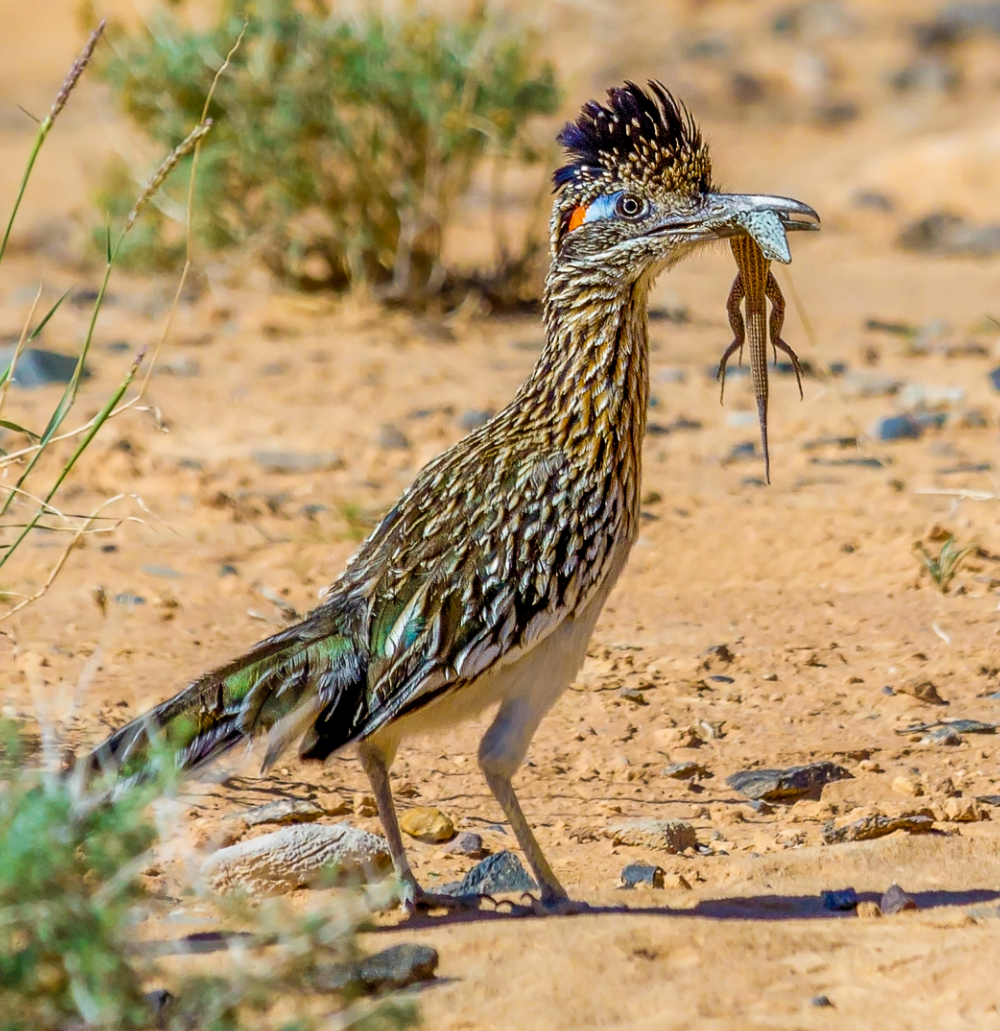

In [32]:
# Example 11: Download an open an image file

# Specify the url for the data
url = "https://biologicslab.co/BIO1173/images/roadrunner.jpg"

# Use the requests.get () function to download the image
response = requests.get(url)

# Use Image.open to open the image
Roadrunner_img = Image.open(BytesIO(response.content))

# Display the image in Jupyter Lab
Roadrunner_img

You should see a color picture of a roadrunner (_Geococcyx californianus_).

### **Exercise 11: Download and open an image file**

In the cell below, download an image of showing an artist's dipiction of the Cambrian ocean located at the URL:"https://biologicslab.co/BIO1173/cambrian.jpg". Call your image `Cambrian_img`. 

Open `Cambrian_img` and display it in your notebook.


In [33]:
# Insert your code for Exercise 11 here



If your code is correct you should see an artist's recreation of a [Cambrian ocean](https://en.wikipedia.org/wiki/Cambrian_explosion) about 541 million years ago. The largest animal is called [Anomalocaris](https://en.wikipedia.org/wiki/Anomalocaris).

## **Lesson Turn-in**

When you have completed all of the code cells, and run them in sequential order (the last code cell should be number 28), use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_01_7.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.